We will use the Colab Python computational environment for the experiment in this subject. Refer to [this nice introduction](https://colab.research.google.com/notebooks/intro.ipynb#) for a comprehensive overview of the environment as well as further references to doing machine learning using Python in Colab.

This notebook is to get us familiarised with using Python to process data. We will dive into an example of building projectors for a dataset. We will explain nontrivial python features while running into them and have most of the Python codes either self-explanatory or with comments for beginners. If you are confused at a point about the Python language, and looking for a more "linear" introduction, check out (and bookmark) [this tutorial](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb) as a reference to the language.

HINT: Because now you are viewing a local copy of this notebook in your Google Drive, feel free to edit and play with the notes and codes. This is __your__ notebook. _Double Click Here_ to see how to take notes with this convenient tool, including embedding [links](https://www.markdowntutorial.com/) and insert math symbols like $x$, $y$ or a function $f: \mathbf X \rightarrow Y$.

# A taste of building a predictor from data

We start with our friend Iris dataset. Basically we are given a set of iris flower data samples, each has four attributes to describe the shape of the flower. The task is to determine the species of the flower according to the shape attributes.

## A small but practical dataset: Iris flowers

The dataset is a text-book example and widely used in machine learning. Instead of downloading from the Internet and perform pre-processing, we will use a prepared version of the dataset provided by the scientific learning `scikit-learn` library of Python.

> The Python backend of Colab (called a "kernel") is a comprehensive version with many useful libraries installed, including `scikit-learn`. Be aware that the library is known within Python as `sklearn` (The operating system and Python "know" the same library with different names)



In [ ]:
from sklearn.datasets import load_iris
import numpy as np
# Imports the NumPy library and gives it the alias np.
# NumPy is a fundamental package for scientific computing in Python.
# It provides support for large, multi-dimensional arrays and matrices,
# along with a collection of mathematical functions to operate on these arrays efficiently

In [ ]:
iris = load_iris()
# The iris is a "dictionary" object, basically it is a complex object with
# a "key-value" structure.

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# Extracts the feature and target from the Iris dataset and assigns them to the variable X and y
X = iris['data']
y = iris['target']

# above two lines are equivalent to
# X, y = iris['data'], iris['target']

## Working with data arrays

we can also investigate an object in Python by looking at its type.

In [ ]:
print(type(X)) # numpy.ndarray

<class 'numpy.ndarray'>


We found that the type of the data is a `numpy.ndarray` -- an n-dimensional array managed by the library `numpy`. `numpy` has been internally imported by `scikit-learn`.

In [ ]:
# Let us check the "shape" of our data array
print(X.shape)

(150, 4)


In [ ]:
y.shape

(150,)

## Indexing in array

Our data space $\mathcal X$ consists of all objects that are described with 4 numbers, -- we call it $\mathbb R^4$. A dataset from this data space will be a 2-D array (table) of $n$ (#.samples) rows and 4 columns. Arrays are ubiquitous objects used in data science. In Python, numerical arrays are usually managed by numerical computation libraries, in this case, `numpy`. You can check the data via array operations provided by `numpy`.



In [ ]:
# In Python and numpy, indexing starts at 0. Here's how to access elements in an array:

# 1. Accessing single elements in a 1-D array
print(y[0])  # Access the first element in array 'y'
print(y[50])  # Access the 51th element in array 'y'
print(y[100])

0
1
2


In [ ]:
# 2. Accessing single elements in a 2-D array
print(X[2, 1])  # Access the element in the third row and second column of array 'X'
print(X[2][1])

3.2
3.2


In [ ]:
# 3. Accessing multiple elements (slicing) in a 1-D array
# start index is inclusive, stop index is exclusive
print(y[1:4])  # Access the second, third, and fourth elements in array 'y'
print(y[0:3])  # Access the first three elements in array 'y'
print(y[:3])   # The same as the previous line, starting index of 0 can be omitted

[0 0 0]
[0 0 0]
[0 0 0]


In [ ]:
# 4. Accessing multiple elements (slicing) in a 2-D array
print(X[1, :2])   # Access the first two elements (columns) in the second row of 'X'
print(X[1, 2:4])  # Access the third and fourth elements in the second row of 'X'    [2] 3rd,  [3] 4th
print(X[1, 2:])   # Same as the previous line, ending index can be omitted if slicing till the end
print(X[1, :])    # Access all elements in the second row, both start and end indices can be omitted
print(X[1])       # Same as the previous line, ':' can be omitted when accessing all elements

[4.9 3. ]
[1.4 0.2]
[1.4 0.2]
[4.9 3.  1.4 0.2]
[4.9 3.  1.4 0.2]


In [ ]:
# 5. Checking the shape of arrays
print(X.shape)  # Prints the shape of array 'X', expected output is (150, 4)
print(X[1].shape)  # Prints the shape of the second row of 'X', expected output is (4, )

(150, 4)
(4,)


In [ ]:
# 6. Accessing specific rows and columns
print(X[5:10, 0])  # Accesses the first column of the sixth to tenth rows in 'X'
print(X[5:10, 0].shape)  # Prints the shape of the accessed elements

[5.4 4.6 5.  4.4 4.9]
(5,)


In [ ]:
# 7. Accessing multiple specified elements
print(X[0, [0, 1, 2]])  # Accesses the first three elements in the first row of 'X'
print(X[0, [0, 2]])  # Accesses the first and third elements in the first row of 'X'

[5.1 3.5 1.4]
[5.1 1.4]


In [ ]:
# 8. Binary Indexing - Selecting elements based on a binary mask
# Create a 1D NumPy array of 6 elements
arr = np.array([10, 20, 30, 40, 50, 60])
print("Original array:", arr)

# Define a binary mask with 6 boolean values
binary_mask = np.array([True, False, True, False, True, True])

# Use the binary mask to select elements from the array
selected_elements = arr[binary_mask]
print("Selected elements:", selected_elements)

Original array: [10 20 30 40 50 60]
Selected elements: [10 30 50 60]


## A simplified dataset

As a running example, we will simplify the problem by
1. using only the first two attributes of the data, and
2. using only the data samples belonging to the first two classes, so the problem becomes a binary classification problem -- (y==0 or y==1).


In [ ]:
print(y == 0) # numpy array takes "==" as element wise comparison
# and returns a binary array

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [ ]:
two_class_index = np.logical_or(y == 0, y == 1) # logical or operation
print(two_class_index)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [ ]:
# first dimension of X, it filters out the rows corresponding to classes 0 and 1.
simple_X = X[two_class_index]
print(simple_X.shape)

(100, 4)


In [ ]:
# second dimension of X, it takes the first two columns from the filtered rows.
simple_X = simple_X[:, 0:2]
print(simple_X.shape)

(100, 2)


In [ ]:
simple_y = y[two_class_index]
print(simple_y.shape)

(100,)


## Building a classification model from scratch

Now we are ready to go. Try to building a predictor $\mathcal X \mapsto \mathcal Y$. First, let us examine our assumption (again) that the link between the observable data attributes and the target does exist.

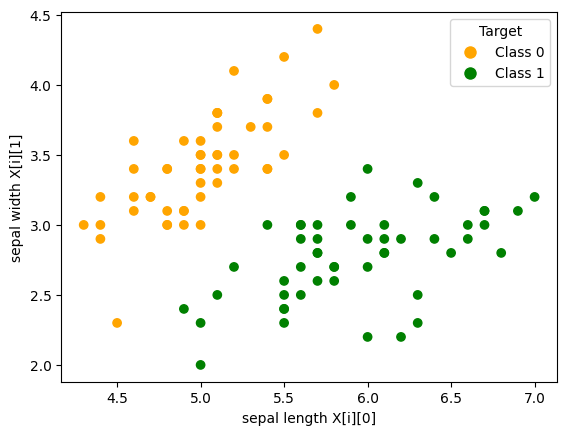

In [ ]:
import matplotlib.pyplot as plt

colors = ['orange' if label == 0 else 'green' for label in simple_y]

plt.scatter(simple_X[:, 0], simple_X[:, 1], c=colors)
plt.xlabel('sepal length X[i][0]')
plt.ylabel('sepal width X[i][1]')

# plt.xlim(left=0)
# plt.ylim(bottom=0)
# Create a custom legend
labels = {0: 'Class 0', 1: 'Class 1'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Class 0'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Class 1')]

plt.legend(handles=handles, title='Target')

plt.show()

In [ ]:
# An example predictor
def predict_iris(X):
    # just by looking at the figure above, I come up with some rules, such as
    # if x0 > 5.8, the flower is vesicolor
    pred_y = []
    num = len(X)
    for i in range(num):
      if X[i][0] >= 5.8:
          pred_y.append(1)
      else:
          pred_y.append(0)
    return pred_y

In [ ]:
# check the performance
y_pred = predict_iris(simple_X)
accuracy = np.mean(y_pred == simple_y)
print("Accuracy:", accuracy)

Accuracy: 0.78


In [ ]:
# [Exercise] Make your own predictor
def my_iris_predictor(X):

    pred_y = []
    num = len(X)
    for i in range(num):
      # Insert your rule here
      if X[i][1] <= 1.22 * X[i][0] - 3.55:
          pred_y.append(1)
      else:
          pred_y.append(0)
    return pred_y

In [ ]:
# check the performance
y_pred = my_iris_predictor(simple_X)
print(y_pred)
accuracy = np.mean(y_pred == simple_y)
print("Accuracy:", accuracy)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy: 1.0


## Using Logistic Regression Model

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create the logistic regression model
clf = LogisticRegression()

# Train the model on the training data
clf.fit(simple_X, simple_y)

# Test the model on the test data
y_pred = clf.predict(simple_X)

# Evaluate the model's performance
accuracy = np.mean(y_pred == simple_y)
print("Accuracy:", accuracy)